### Line detection using hough transform

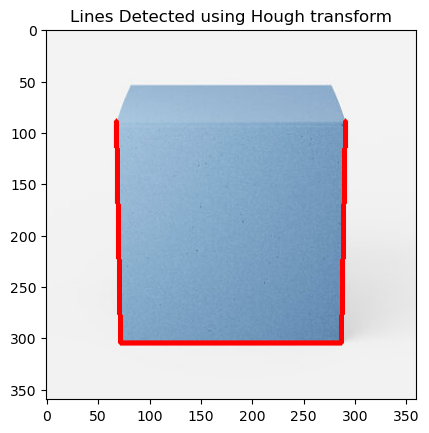

In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('360_F_493695043_SBlf8qmXQ38i1iWgwlwYutwVQm7GPT6l.jpg', cv2.IMREAD_COLOR) 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50 , minLineLength=200, maxLineGap=250)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)


plt.imshow(img)
plt.title('Lines Detected using Hough transform')
plt.show()


### Curve detection using harris 

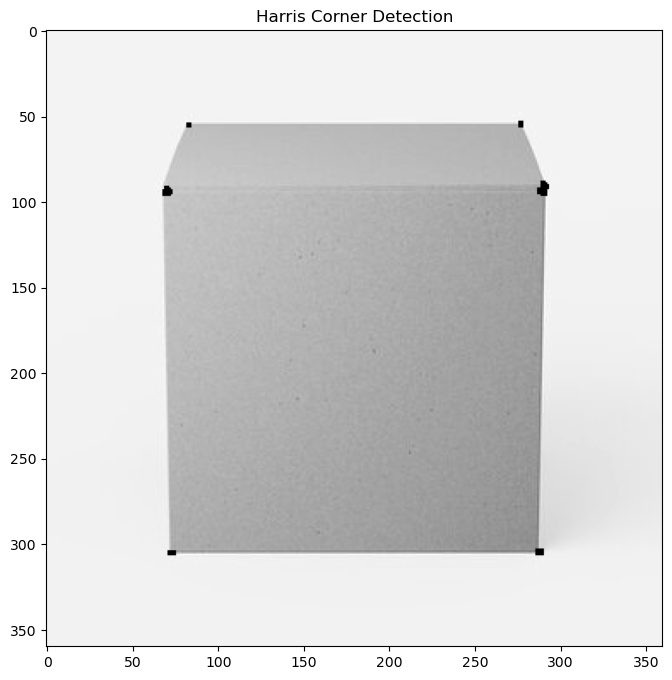

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image, block_size=2, ksize=3, alpha=0.04, threshold_ratio=0.01):
  
    
    # Step 1: Convert the image to float32 (required by cornerHarris)
    gray_image = np.float32(image)
    
    # Step 2: Apply cornerHarris to detect corners
    corner_response = cv2.cornerHarris(gray_image, block_size, ksize, alpha)
    
    # Step 3: Apply a threshold to identify strong corners
    threshold = threshold_ratio * corner_response.max()  # Threshold for corner detection
    corners = np.zeros_like(corner_response)
    corners[corner_response > threshold] = 255  # Mark corners with a white color
    
    # Step 4: Dilate the corners to make them more visible
    corners = cv2.dilate(corners, None)
    
    # Step 5: Show the result with corners highlighted
    image_with_corners = np.copy(image)
    image_with_corners[corners == 255] = 0 # Mark the corners in white
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image_with_corners, cmap='gray')
    plt.title('Harris Corner Detection')
    plt.show()

    return corners

# Example of usage:

# Load an image in grayscale
image = cv2.imread('360_F_493695043_SBlf8qmXQ38i1iWgwlwYutwVQm7GPT6l.jpg', cv2.IMREAD_GRAYSCALE)
# Call the function with the image
harris_corner_detection(image)


### Object segmentation using harris and hough

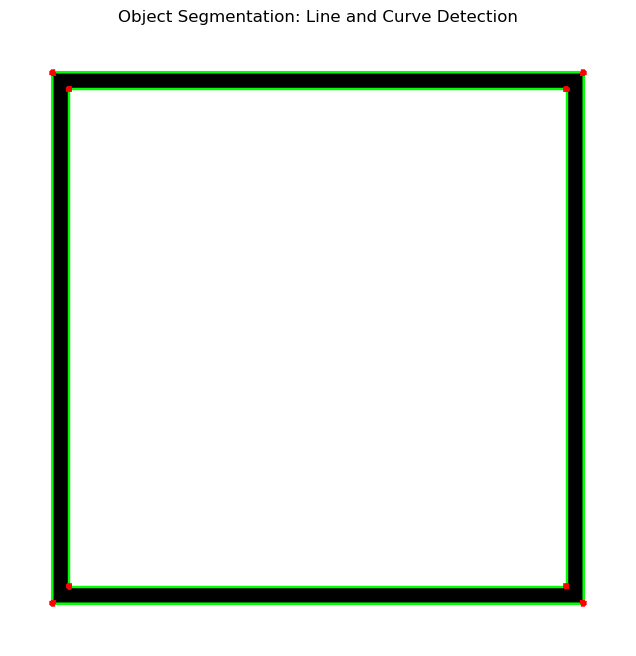

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_line_detection(image, threshold=100):
    """
    Perform line detection using Hough Transform.
    
    Parameters:
    - image: Grayscale input image for line detection.
    - threshold: Threshold for the line accumulator (higher values reduce false positives).
    
    Returns:
    - lines: Detected lines in the image.
    """
    # Step 1: Apply Canny edge detection to find edges in the image
    edges = cv2.Canny(image, 50, 150)
    
    # Step 2: Apply Hough Line Transform (Probabilistic version)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold, minLineLength=30, maxLineGap=5)
    
    return lines, edges

def harris_corner_detection(image, block_size=5, ksize=3, alpha=0.04, threshold_ratio=0.01):
  
  
    # Convert the image to float32 (required by cornerHarris)
    gray_image = np.float32(image)
    
    # Apply cornerHarris to detect corners
    corner_response = cv2.cornerHarris(gray_image, block_size, ksize, alpha)
    
    # Apply a threshold to identify strong corners
    threshold = threshold_ratio * corner_response.max()  # Threshold for corner detection
    corners = np.zeros_like(corner_response)
    corners[corner_response > threshold] = 255  # Mark corners with a white color
    
    # Dilate the corners to make them more visible
    corners = cv2.dilate(corners, None)
    
    return corners

def segment_objects(image_path):
 
    # Step 1: Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Step 2: Line Detection (Hough Transform)
    lines, edges = hough_line_detection(image)
    
    # Step 3: Harris Corner Detection (for detecting curves)
    corners = harris_corner_detection(image)
    
    # Step 4: Create a copy of the original image to draw the results
    result_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    # Draw the detected lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  

    # Draw the detected corners on the image
    result_image[corners == 255] = [255, 0, 0]  
  
    plt.figure(figsize=(8, 8))
    plt.imshow(result_image)
    plt.title('Object Segmentation: Line and Curve Detection')
    plt.axis('off')
    plt.show()

# Example usage:
image_path = 'box.jpg'  
segment_objects(image_path)
